# What is PyTorch

An open-source ML library for Python, its provide computation using GPU and support numerical optimization on generic mathematical expression.

PyTorch using a data structure call tensor, in the context of deep learning this is refer to the generalization of vectors and matrices to an arbitrary number of dimensions.

# Using PyTorch for preprocessing

In [ ]:
%pip install torchvision

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Define the transformations this is base on the book Deep learning with PyTorch
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image
    transforms.CenterCrop(224),     # Crop the center of the image
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the tensor this step is done to help with the stability of training.
])

# The value use for normalization is taken from the ImageNet dataset.

# Load an image using PIL
image_path = 'your image path go here'
image = Image.open(image_path)

# Apply the transformations
preprocessed_image = transform(image)

# Add an extra dimension to represent batch size (1 in this case)
preprocessed_image = preprocessed_image.unsqueeze(0)

The code above give the student an example of how pytorch preprocess an image for training, I think this can help them to create their method for preprocessing different type of data. They can also try preprocess without the normalization step and train two models one for normalize dataset and one for un-normalize and see which dataset did a better job.

For text and audio preprocessing, they can use library such as **nltk, spacy** to work with the text and **torchaudio** if they want to work with audio

The approach should be similar to image preprocessing and this can be one of the homework for the student

The flow for text processing will be:
1. Tokenization from a sentence or input from a file
2. Lowercasing, removing stopwords and punctuation
3. Vectorization (this can be done using **Bag of Words, TF-IDF, Word Embedding**)

# Loading and Using a pretrained model

In [37]:
import torch
import torchvision.transforms as transforms
import requests
from torchvision import models
from PIL import Image

# Load the pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((232, 232)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the input image
image_path = r'C:\Users\tuanp\Desktop\20171105-IMG_0043.png' #Student can modify this path to their image
image = Image.open(image_path)
input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad(): # Since we do not want to update any parameter of the model using toch.no_grad will accomplished its for us
    output = model(input_batch)

# Load the labels used by the pre-trained model (e.g., ImageNet classes)
labels_path = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
labels = eval(requests.get(labels_path).text)


# Get the predicted class
_, predicted_idx = torch.max(output, 1)
predicted_label = labels[predicted_idx.item()]

print(f"Predicted Label: {predicted_label}")

Predicted Label: Pembroke Welsh Corgi


In [34]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights

img = read_image(r'C:\Users\tuanp\Desktop\20171105-IMG_0043.png')

# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

Pembroke: 47.4%


The second approach is directly from the **PyTorch** webpage and the first one is give the student some modification on how they want the preprocessing step belike.

This is the image use for the pretrained model

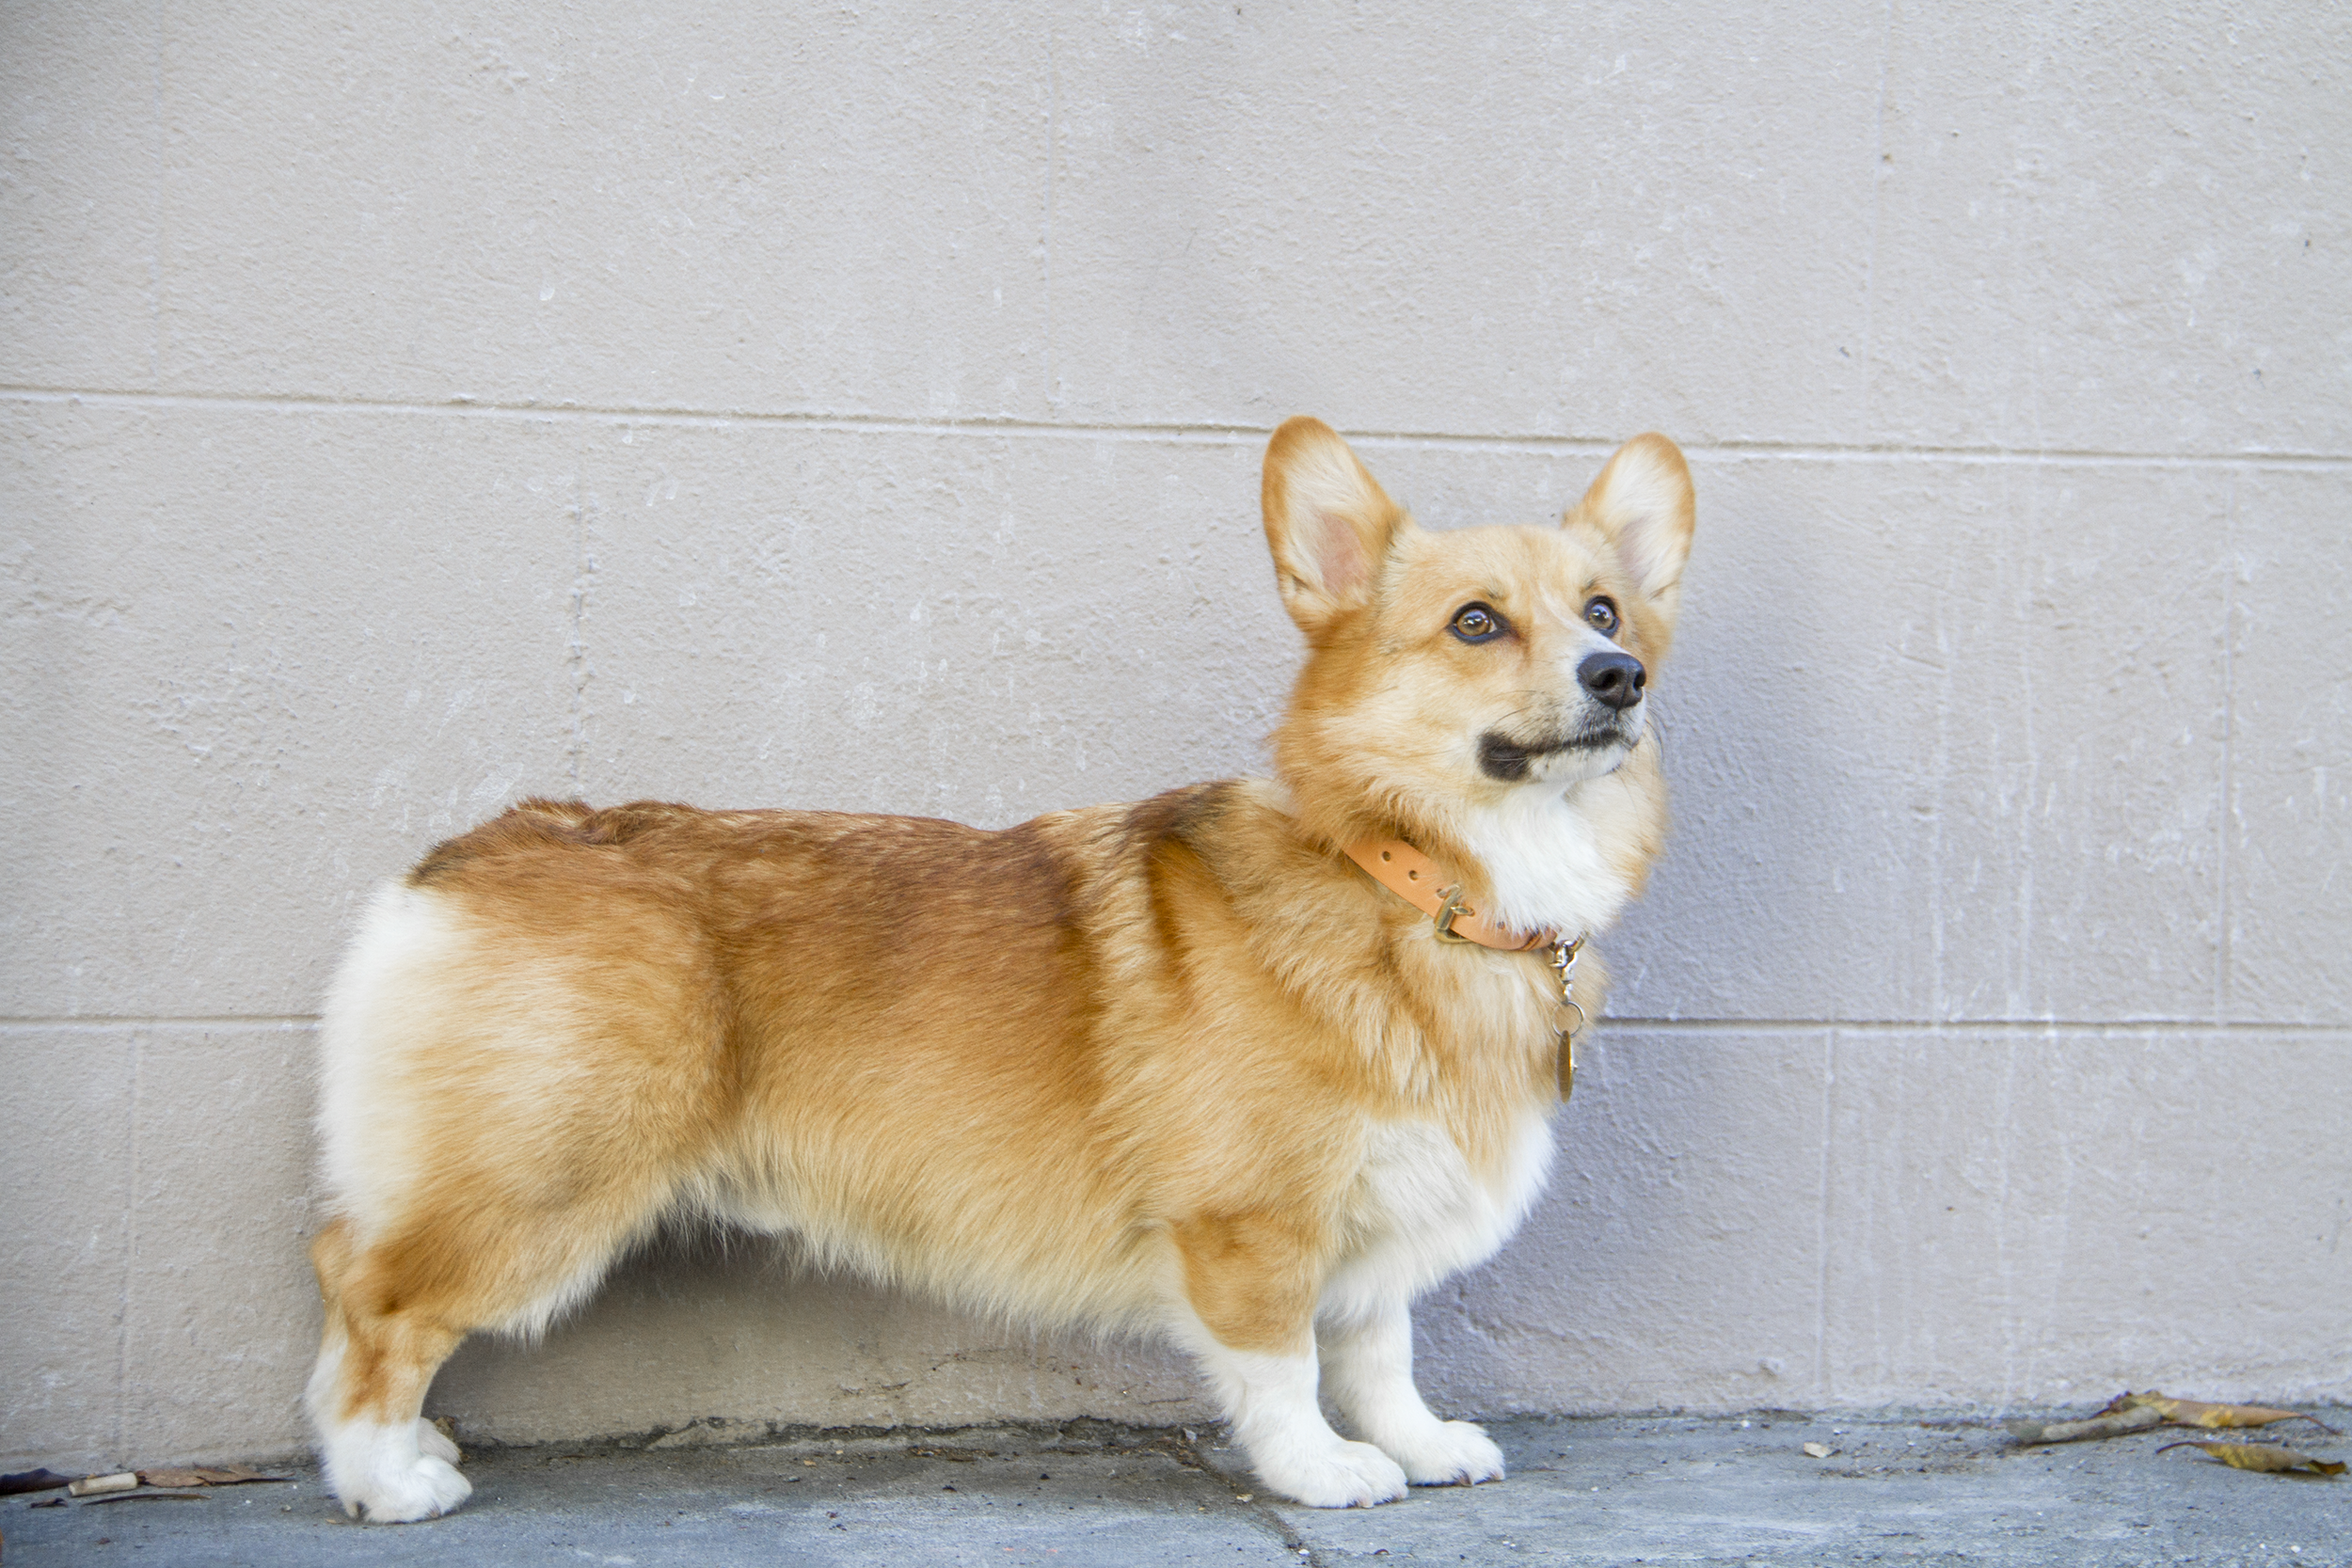

In [26]:
from IPython.display import display, Image
from PIL import Image as PILImage

# Path to your image
image_path = r'C:\Users\tuanp\Desktop\20171105-IMG_0043.png'

# Load and display the image
img = PILImage.open(image_path)
display(img)